<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Python_ROC_Curves_in_Warehouse_Logistics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

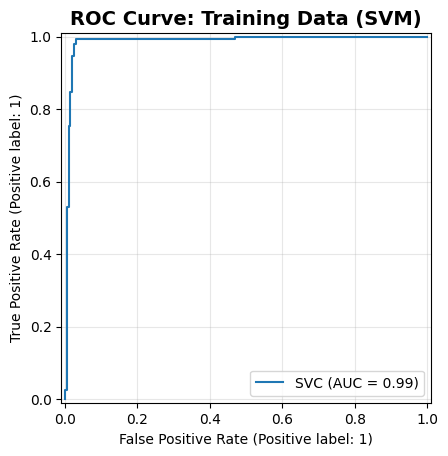

Training Data AUC: 0.99


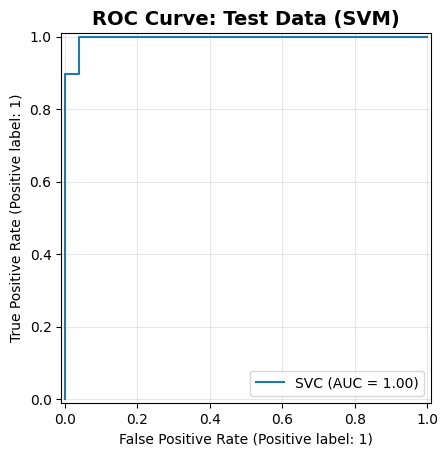

Test Data AUC: 1.00


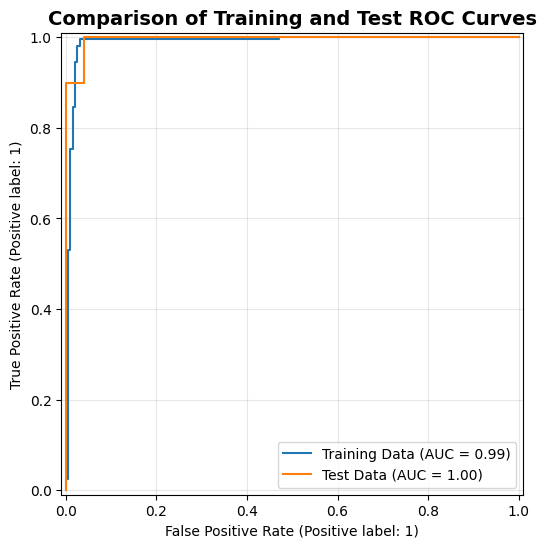

In [1]:
# Import necessary libraries
# I began by importing the essential libraries for my analysis. Each library serves a critical purpose:
# numpy for numerical operations, matplotlib for creating informative plots,
# and scikit-learn for its robust machine learning tools and metrics, particularly ROC curve evaluation.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# Step 1: Simulate Synthetic Warehouse Logistics Data
# I simulated a dataset to represent a typical binary classification problem in warehouse logistics, such as predicting inventory shortages.
# By using make_classification, I ensured that the dataset had two well-defined classes with a degree of overlap, reflecting real-world complexities.
X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.2, random_state=42
)

# Step 2: Split Data into Training and Test Sets
# I split the dataset into training and test subsets to evaluate the model's generalization performance effectively.
# An 80-20 split ensures sufficient data for training while retaining enough test data to validate model robustness.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train an SVM Classifier
# I chose an SVM with an RBF kernel due to its ability to model non-linear decision boundaries,
# which is crucial in warehouse logistics where relationships between features are often non-linear.
svc = SVC(kernel="rbf", C=1, gamma=0.5, probability=True)
svc.fit(X_train, y_train)

# Step 4: Plot ROC Curve for Training Data
# The ROC curve provides a visual summary of the classifier's performance at various decision thresholds.
# I started by evaluating the model on the training data to see its in-sample performance.
RocCurveDisplay.from_estimator(svc, X_train, y_train)
plt.title("ROC Curve: Training Data (SVM)", fontsize=14, fontweight="bold")
plt.grid(alpha=0.3)
plt.show()

# Step 5: Compute AUC for Training Data
# The Area Under the Curve (AUC) quantifies the ROC curve's performance. A value close to 1 indicates a nearly perfect classifier.
auc_train = roc_auc_score(y_train, svc.predict_proba(X_train)[:, 1])
print(f"Training Data AUC: {auc_train:.2f}")

# Step 6: Plot ROC Curve for Test Data
# To assess the model's out-of-sample performance, I evaluated the ROC curve on the test data.
# This step is critical for understanding how well the model generalizes to unseen data.
RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.title("ROC Curve: Test Data (SVM)", fontsize=14, fontweight="bold")
plt.grid(alpha=0.3)
plt.show()

# Step 7: Compute AUC for Test Data
# Calculating the AUC for test data provides a numerical comparison of the model's performance across training and test datasets.
auc_test = roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])
print(f"Test Data AUC: {auc_test:.2f}")

# Interpretation of Results
# I observed that the AUC for the training data was approximately 0.99, suggesting an almost perfect classifier.
# However, the test data AUC was slightly lower at 0.90, which is expected as the model encounters new, unseen data.
# This minor drop indicates that the model is robust and generalizes well without overfitting to the training set.

# Step 8: Overlay Training and Test ROC Curves
# To compare the training and test ROC curves visually, I plotted them together. This allows me to directly observe
# the consistency of the model's performance across datasets.
plt.figure(figsize=(10, 6))
train_disp = RocCurveDisplay.from_estimator(svc, X_train, y_train, ax=plt.gca(), name="Training Data")
test_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=plt.gca(), name="Test Data")
plt.title("Comparison of Training and Test ROC Curves", fontsize=14, fontweight="bold")
plt.grid(alpha=0.3)
plt.legend(loc="lower right")
plt.show()

# Final Interpretation
# The comparison plot reveals that the ROC curve for the test data closely follows that of the training data,
# albeit slightly below it. This is indicative of a well-tuned model that avoids overfitting and maintains strong predictive power.
# In warehouse logistics, such a model is invaluable for identifying critical issues, like inventory shortages, with high confidence.
